In [306]:
import pandas as pd
import numpy as np

In [307]:
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [308]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [309]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [310]:
iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [311]:
iris_dict = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
iris['Species'] = iris['Species'].map(iris_dict)

In [312]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [313]:
iris = iris.drop(['Id'],axis=1)

In [314]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


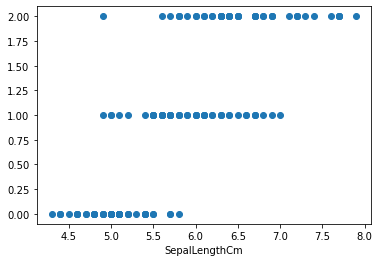

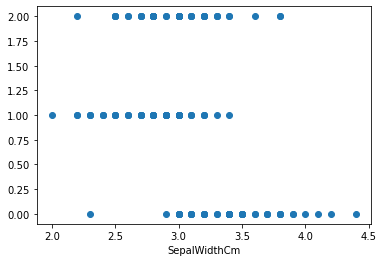

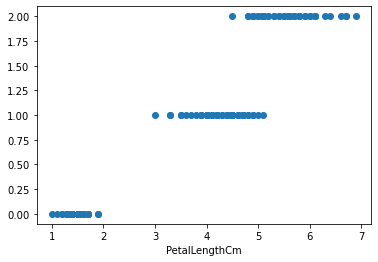

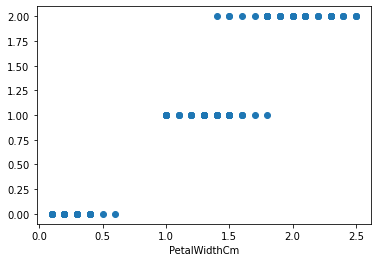

In [315]:
for feature in iris.columns[:4]:
    plt.scatter(iris[feature],iris['Species'])
    plt.xlabel(feature)
    plt.show()

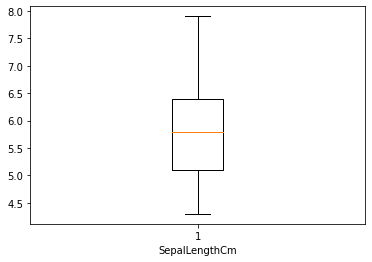

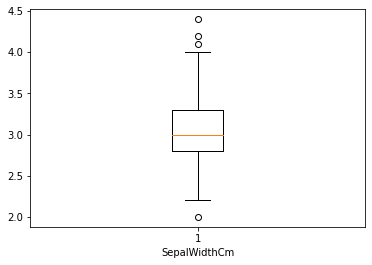

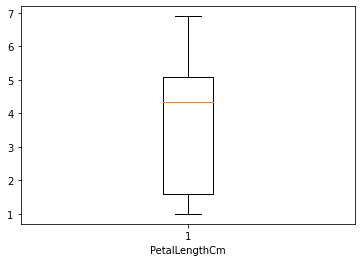

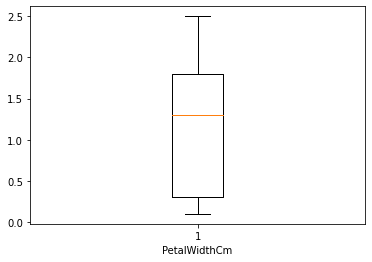

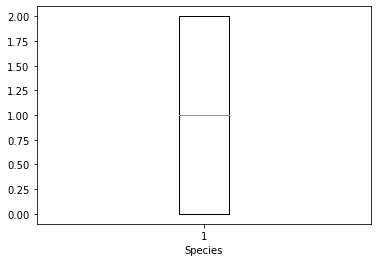

In [316]:
for feature in iris.columns:
    data = iris.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [317]:
for feature in iris.columns:
    IQR= iris[feature].quantile(0.75) - iris[feature].quantile(0.25)
    
    lower_bridge = iris[feature].quantile(0.25)-(IQR*1.5)
    upper_bridge = iris[feature].quantile(0.75)+(IQR*1.5)
    
    lower_bridge3 = iris[feature].quantile(0.25)-(IQR*3)
    upper_bridge3 = iris[feature].quantile(0.75)+(IQR*3)
    
    
    iris.loc[iris[feature]<=lower_bridge,feature] = lower_bridge
    iris.loc[iris[feature]>=upper_bridge,feature] = upper_bridge
    
    

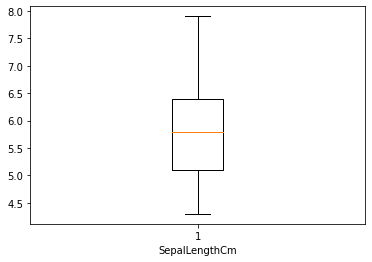

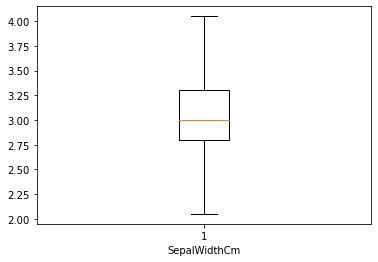

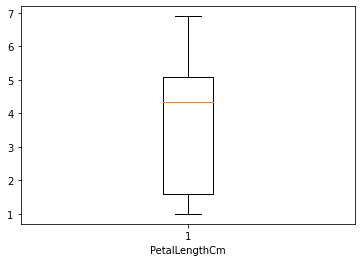

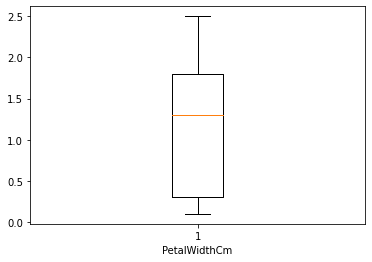

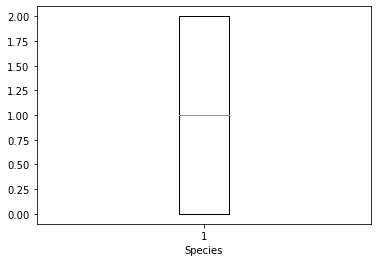

In [318]:
for feature in iris.columns:
    data = iris.copy()
    plt.boxplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.show()

In [319]:
import seaborn as sns
import matplotlib.pyplot as plt

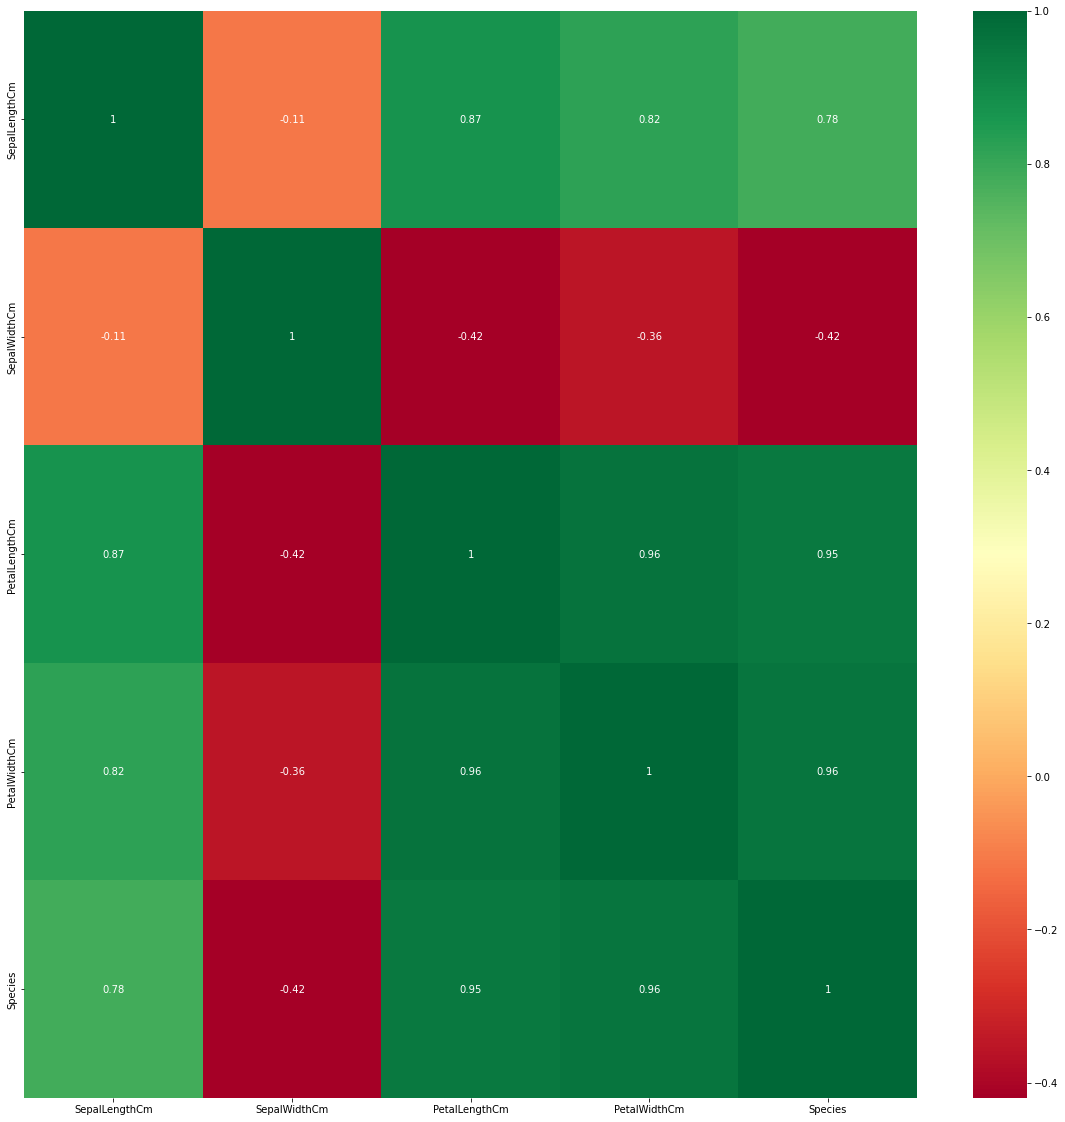

In [320]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = iris.corr()

top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(iris[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [321]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [322]:
X = iris.iloc[:,:4]
y = iris.iloc[:,4]

In [323]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [324]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [325]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [326]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [327]:
y_pred = classifier.predict(X_test_scaled)

In [328]:
from sklearn.metrics import r2_score,mean_squared_error

In [329]:
from sklearn.metrics import accuracy_score,roc_auc_score

print("MSE:",mean_squared_error(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

MSE: 0.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [331]:
lg = LogisticRegression(max_iter=10000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [332]:
y_pred = lg.predict(X_test)

In [336]:
from sklearn.metrics import r2_score,mean_squared_error
#print('accuracy =',r2_score(y_test, y_pred)*100,"%")
print("MSE:",mean_squared_error(y_test,y_pred))

print(confusion_matrix(y_test,y_pred))
print(f'Accuracy: {accuracy_score(y_test,y_pred)*100}%')
print(classification_report(y_test,y_pred))

MSE: 0.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy: 100.0%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

